# Random Forest Classifier

In [1]:
# Data cleaning 
import pandas as pd
import numpy as np 
#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,MinMaxScaler,RobustScaler

#model evaluation
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,classification_report,confusion_matrix

#Ensemble techniques
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier

from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.tree import DecisionTreeClassifier
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_excel("glass.xlsx",sheet_name='glass')

In [3]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
df.tail()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
209,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [5]:
df_desc=pd.read_excel('glass.xlsx',sheet_name='Description')

In [6]:
df_desc

,Prepare a model for glass classification using Random Forest
0,Data Description:
1,RI : refractive index
2,Na: Sodium (unit measurement: weight percent i...
3,Mg: Magnesium
4,AI: Aluminum
5,Si: Silicon
6,K:Potassium
7,Ca: Calcium
8,Ba: Barium
9,Fe: Iron


In [7]:
df.shape

(214, 10)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [9]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [10]:
df.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [11]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [12]:
df['Type'].value_counts()

Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64

In [13]:
df.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


In [14]:
df.shape[1]

10

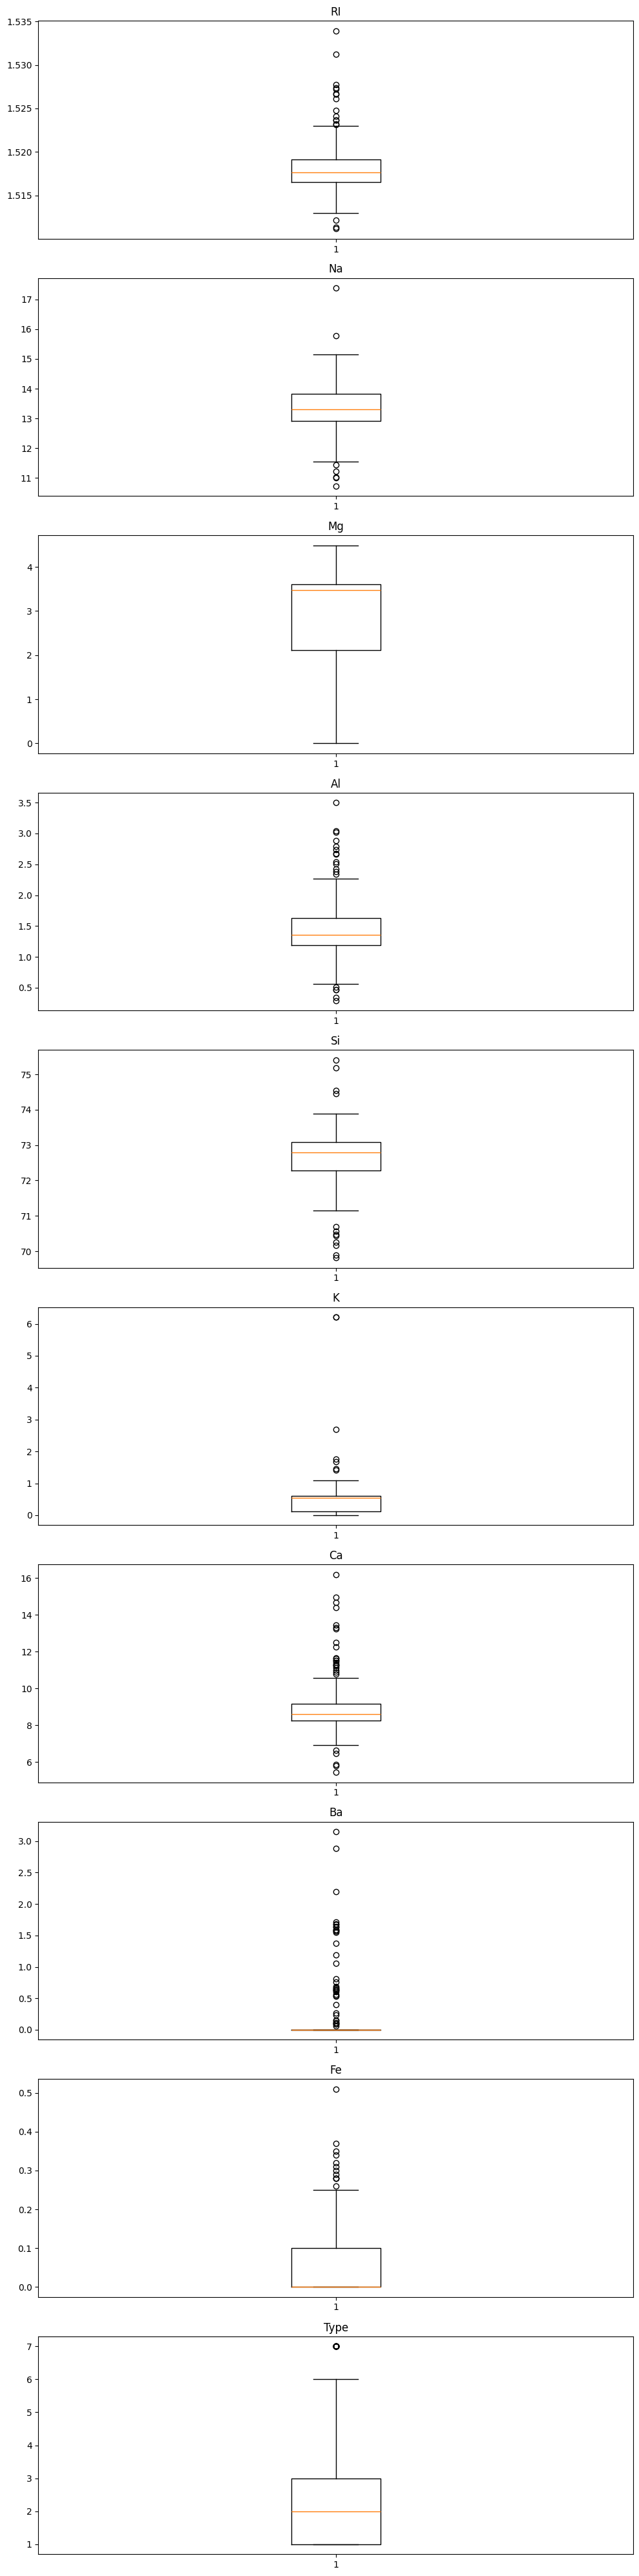

In [15]:
fig, axes = plt.subplots(df.shape[1], 1, figsize=(10, 4*df.shape[1]))
for i in range(df.shape[1]):
    axes[i].boxplot(df.iloc[:, i])
    axes[i].set_title(df.columns[i])
plt.tight_layout()
plt.show()

<Figure size 1500x1000 with 0 Axes>

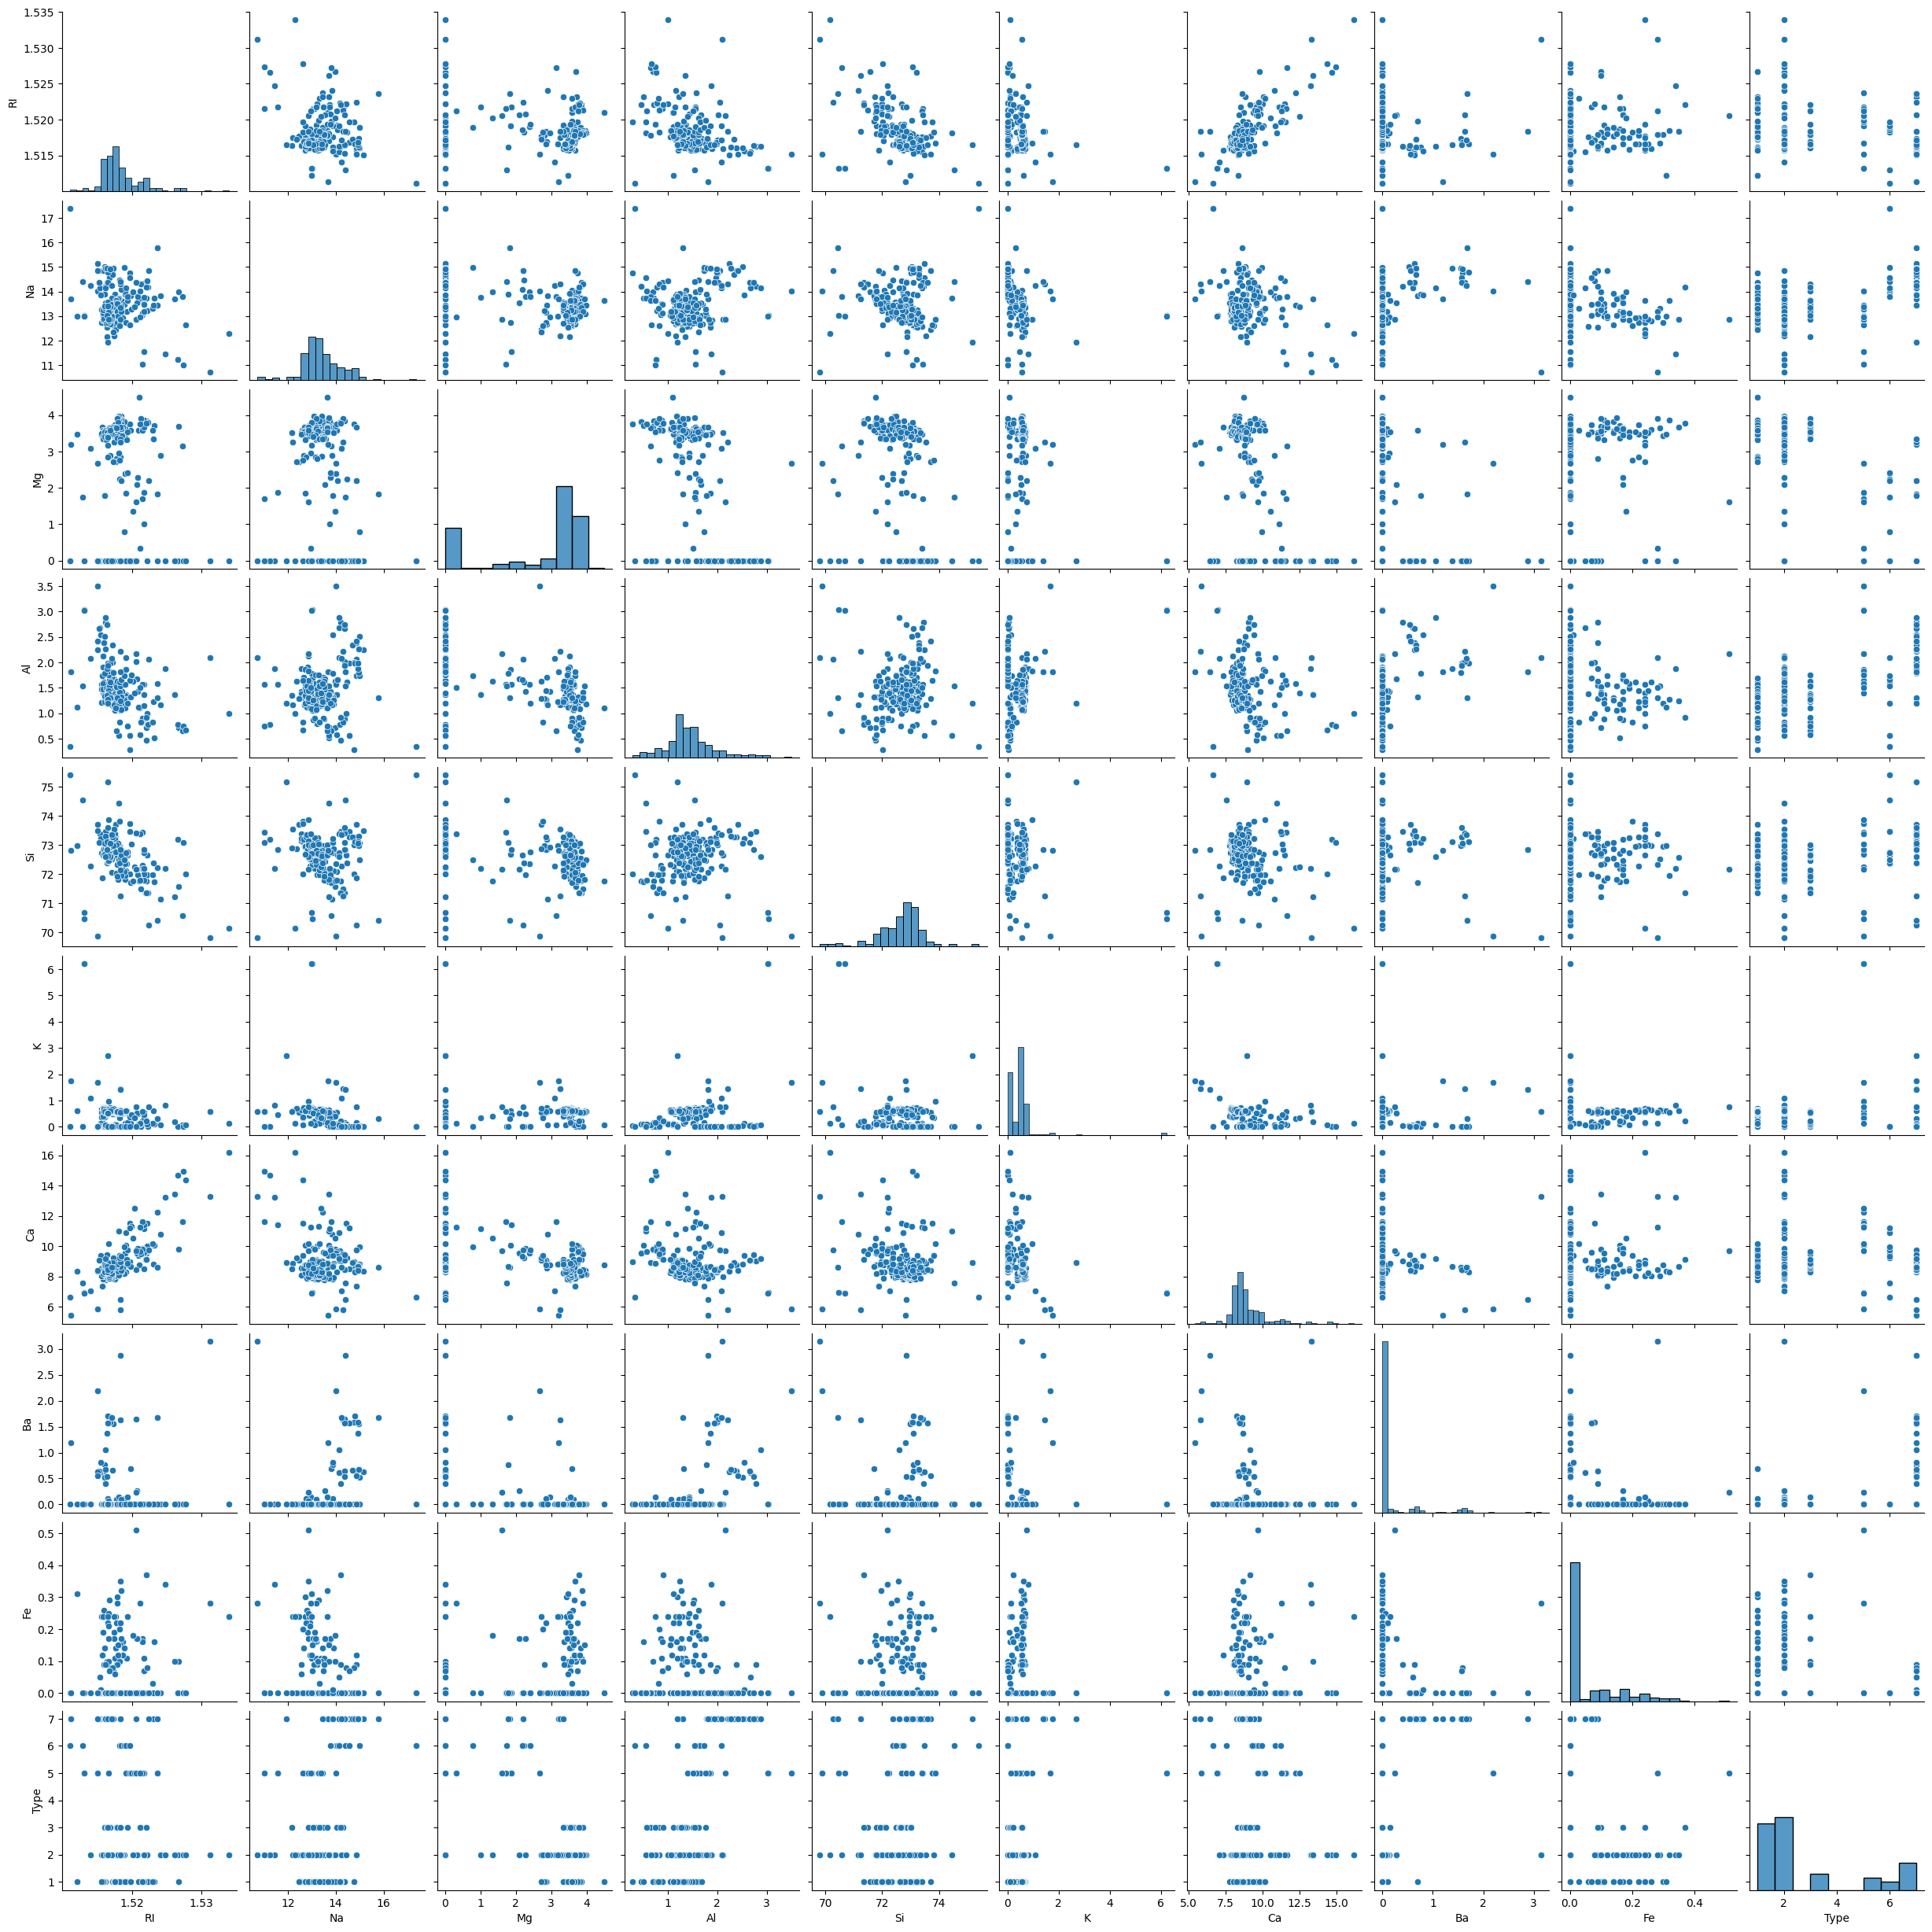

In [16]:
plt.figure(figsize=(15,10))
sns.pairplot(df)

In [17]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [18]:
RS=RobustScaler()
df['Si']=RS.fit_transform(df[['Si']])

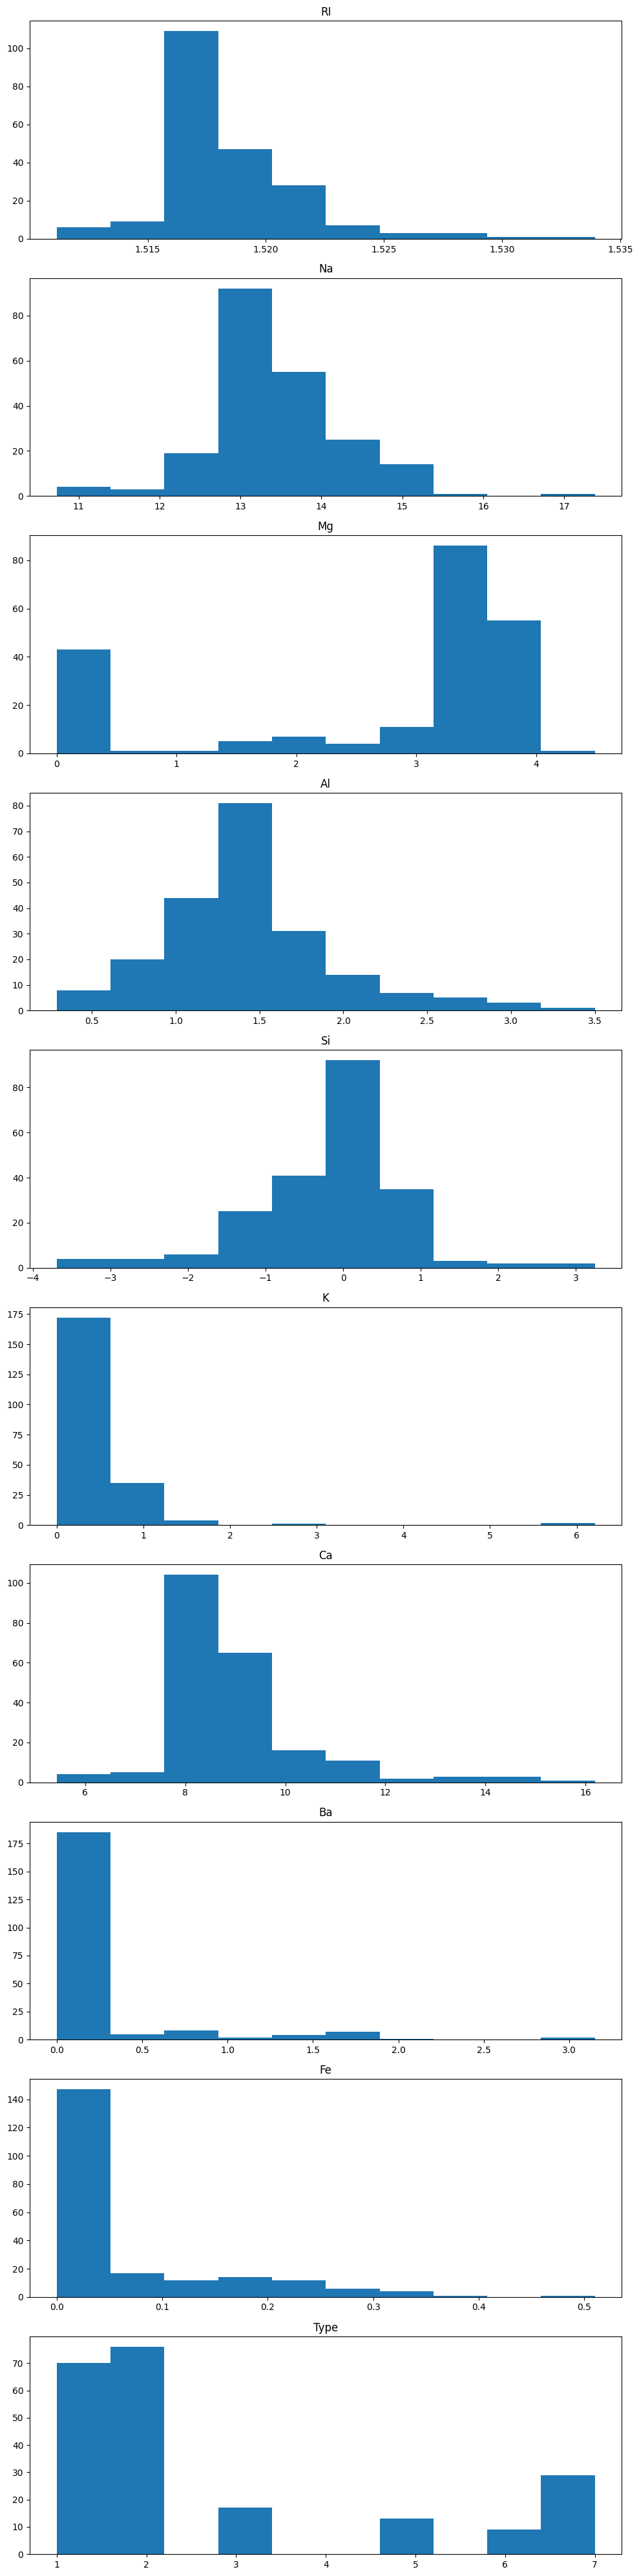

In [19]:
fig, axes = plt.subplots(df.shape[1], 1, figsize=(10, 4*df.shape[1]))
for i in range(df.shape[1]):
    axes[i].hist(df.iloc[:, i])
    axes[i].set_title(df.columns[i])
plt.tight_layout()
plt.show()

In [20]:
df.skew()

RI      1.625431
Na      0.454181
Mg     -1.152559
Al      0.907290
Si     -0.730447
K       6.551648
Ca      2.047054
Ba      3.416425
Fe      1.754327
Type    1.114915
dtype: float64

In [21]:
df['K']=np.log1p(df['K'])

In [22]:
df['Ba']=np.log1p(df['Ba'])

In [23]:
df['Ba'].skew()

np.float64(2.7266701482447755)

In [24]:
X=df.drop(columns='Type')
y=df['Type']

In [25]:
# There is no need for the data as the random forest can handle the outliers

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=43)

In [27]:
RF=RandomForestClassifier(n_estimators=100,max_depth=5,max_features=int(np.sqrt(X.shape[1])),random_state=5)


In [28]:
RF_model=RF.fit(X_train,y_train)

In [29]:
y_pred=RF_model.predict(X_test)

In [30]:
accuracy_score(y_test,y_pred)

0.6744186046511628

In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.65      0.81      0.72        16
           2       0.60      0.60      0.60        15
           3       0.00      0.00      0.00         4
           5       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         1
           7       1.00      0.80      0.89         5

    accuracy                           0.67        43
   macro avg       0.65      0.70      0.67        43
weighted avg       0.62      0.67      0.64        43



In [32]:
y_rf_train_pred=RF_model.predict(X_train)

In [34]:
accuracy_score(y_train,y_rf_train_pred)

0.9122807017543859

In [35]:
scores=cross_val_score(RF_model,X,y,cv=4,scoring='accuracy')

In [36]:
scores.mean()

np.float64(0.6730433263452131)

In [37]:
# Baggingclassifier

In [38]:
BC=BaggingClassifier()

In [39]:
bagg_model=BC.fit(X_train,y_train)

In [40]:
y_bag_pred=bagg_model.predict(X_test)

In [41]:
print(classification_report(y_test,y_bag_pred))

              precision    recall  f1-score   support

           1       0.67      0.75      0.71        16
           2       0.56      0.60      0.58        15
           3       1.00      0.25      0.40         4
           5       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         1
           7       1.00      0.80      0.89         5

    accuracy                           0.67        43
   macro avg       0.82      0.73      0.73        43
weighted avg       0.71      0.67      0.67        43



In [42]:
y_bag_train_pred=bagg_model.predict(X_train)

In [43]:
accuracy_score(y_train,y_bag_train_pred)

0.9766081871345029

In [44]:
# Using KFold
scores=cross_val_score(bagg_model,X,y,cv=4,scoring='accuracy')

In [45]:
print("Mean Accuracy:",np.mean(scores))

Mean Accuracy: 0.6641334730957372


In [46]:
# AdaboostClassifier

In [47]:
# We can tune the parameters to get better accurcy
card=DecisionTreeClassifier(max_depth=3) 

ADC=AdaBoostClassifier(estimator=card,n_estimators=5,random_state=5)

In [48]:
ADC_model=ADC.fit(X_train,y_train)

In [49]:
y_adc_pred=ADC_model.predict(X_test)

In [50]:
print(classification_report(y_test,y_adc_pred))

              precision    recall  f1-score   support

           1       0.71      0.75      0.73        16
           2       0.67      0.80      0.73        15
           3       0.00      0.00      0.00         4
           5       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         1
           7       1.00      0.80      0.89         5

    accuracy                           0.72        43
   macro avg       0.67      0.72      0.69        43
weighted avg       0.67      0.72      0.69        43



In [51]:
y_adc_train_pred=ADC_model.predict(X_train)

In [52]:
accuracy_score(y_train,y_adc_train_pred)

0.7777777777777778

In [53]:
scores=cross_val_score(ADC_model,X,y,cv=20,scoring='accuracy')

In [54]:
scores

array([0.45454545, 0.63636364, 0.81818182, 0.72727273, 0.72727273,
       0.81818182, 0.45454545, 0.81818182, 0.81818182, 0.54545455,
       0.72727273, 0.81818182, 0.72727273, 0.81818182, 0.2       ,
       0.7       , 0.8       , 0.6       , 0.8       , 0.7       ])

In [55]:
print("Mean Accuracy:",np.mean(scores))

Mean Accuracy: 0.6854545454545454


1. Explain Bagging and Boosting methods. How is it different from each other.
    * **Bagging**:It is an ensemble method that bulild multiple independent models on randomm
      subsets of data (with replacement) and combines their predictions throug majarity         voting for classification and avg for Regression.It mainly reduces variance and           helps prevent overfitting.Ex:Random Forest
    * **Boosting**:It is an ensemble method that build models sequentially,where each new           model tries to correct errors made byy previous models.It focus more on the               misclassified samples and combine predictions using weighted sum. Boosting mainly         reduces bias and improve accuracy.Ex:Adaboost,GradianBoost,XGBoost
    * Bagging: When the model overfits (high variance) or the dataset is noisy.
    * Boosting: When the model underfits (high bias) or you want maximum predictive             accuracy
   
2. Explain how to handle imbalance in the data.

   * **Imbalanced dataset:** An Imbalanced dataset is one where target classes are not equally represented.For example 0 are 90% and 1 are 10% ,standard model may ignore the minority class ,leading to poor performance on that class.
   * There are several approaches to handle them,some of them are
     1. Evalution metrics:
         * Use metrics that focus on minority class: Precision, Recall, F1-score, ROC-AUC, PR-AUC.Avoid plain accuracy.
     2. Algorithm Techniques:
         * Adjust class weights in models (class_weight='balanced').
         * Use ensemble methods like Balanced Random Forest or RUSBoost.
     3. Resampling Technique:
         * Unersampling:Reduce majority class samples
         * oversampling: Duplicate or synthetically generate minority class samples
    